In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations

### This notebook is used to analyze the data and to obtain the limits on the photometry magnitudes of the Wolf-Rayet Stars, wich is useful to obtain new stars in that area that are not Wolf-Rayet. The Not Wolf-Rayet stars were extracted from the Gaia Database, with an ADQL query, you could see the query in the 'query.txt' file.

In [6]:
catalogo_clasificaciones = pd.read_csv('Archivos/Crowther/catalogo_final_extenso.csv')
catalogo_entrenar = pd.read_csv('Archivos/Crowther/catalogo_entrenamiento_filtradototal.csv')

In [8]:
# This script is to know the photometry quality of the stars, we have WR from two different sources (but the same databases), thats the reason why we have two columns
columnas_analizar = ['ph_qual', 'ph_qual_2']
def mostrar_valores_unicos(data, columnas):
    for col in columnas:
        print(f"\nValores únicos en la columna '{col}':")
        print(data[col].value_counts())

mostrar_valores_unicos(catalogo_entrenar, columnas_analizar)


Valores únicos en la columna 'ph_qual':
ph_qual
AAA    179
AEA      2
EEE      1
UAU      1
AUU      1
Name: count, dtype: int64

Valores únicos en la columna 'ph_qual_2':
ph_qual_2
AAAA    97
AAAB    30
AAAU    17
BAAA    12
AABU     7
BBAA     4
AAAC     3
AABB     2
AABA     2
BAZZ     1
BBAB     1
AAUU     1
AACU     1
BAAB     1
UUAA     1
AABC     1
CBAA     1
BBBB     1
CUAA     1
Name: count, dtype: int64


# Gráficos
1. [Histogramas color](#Histogramas_color)
   * [Fondo transparente](#Fondo_transparente)
   * [Histogramas color por tipo](#hist_color_tipo)
2. [color - color](#color-color)

# Histogramas color
<a id='Histogramas_color'></a>

In [3]:
colores_gaia = ['Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp']
colores_tmass = ['Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag']
colores_wise = ['W1-W2', 'W1-W3', 'W2-W3']
color_columns = ['GAIA_G-GAIA_Bp', 'GAIA_G-GAIA_Rp', 'GAIA_Bp-GAIA_Rp', 'Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag',
                'W1-W2', 'W1-W3', 'W2-W3']

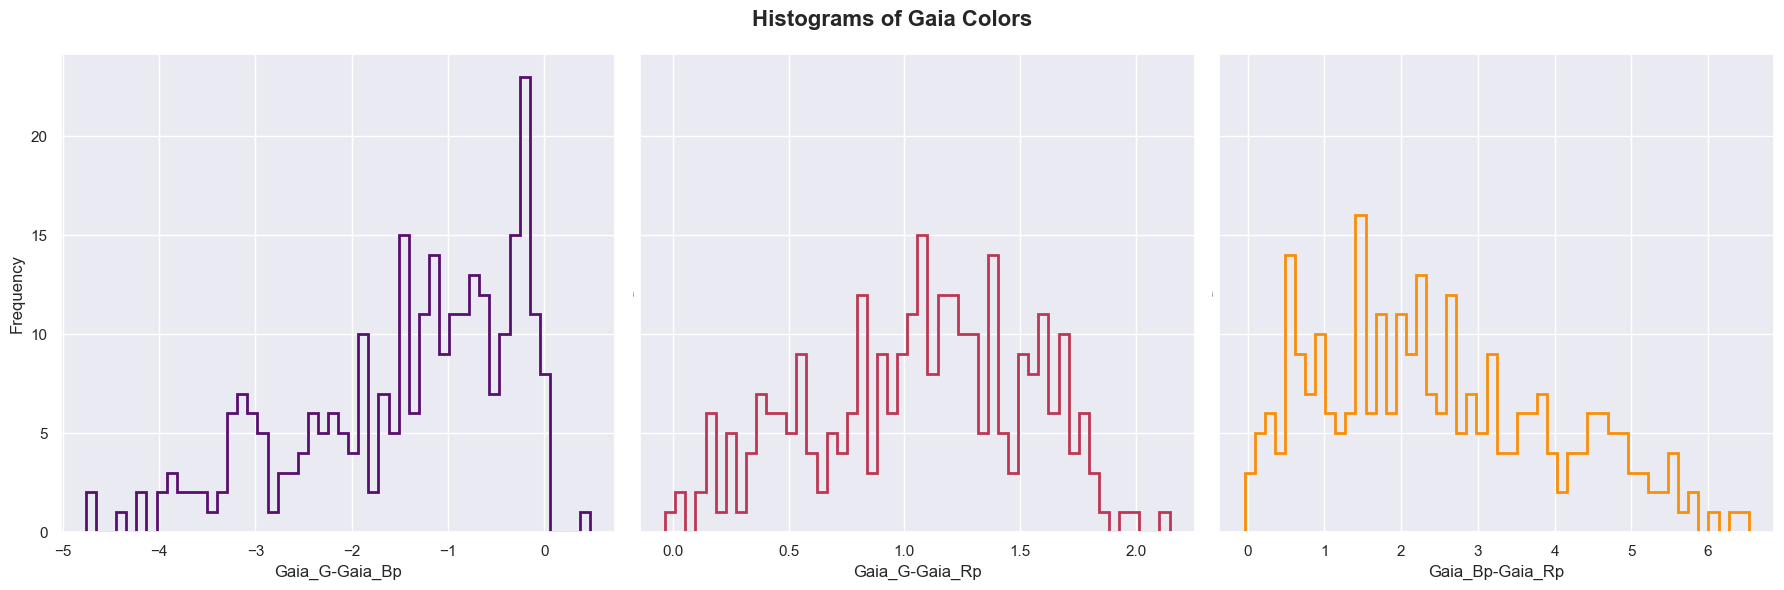

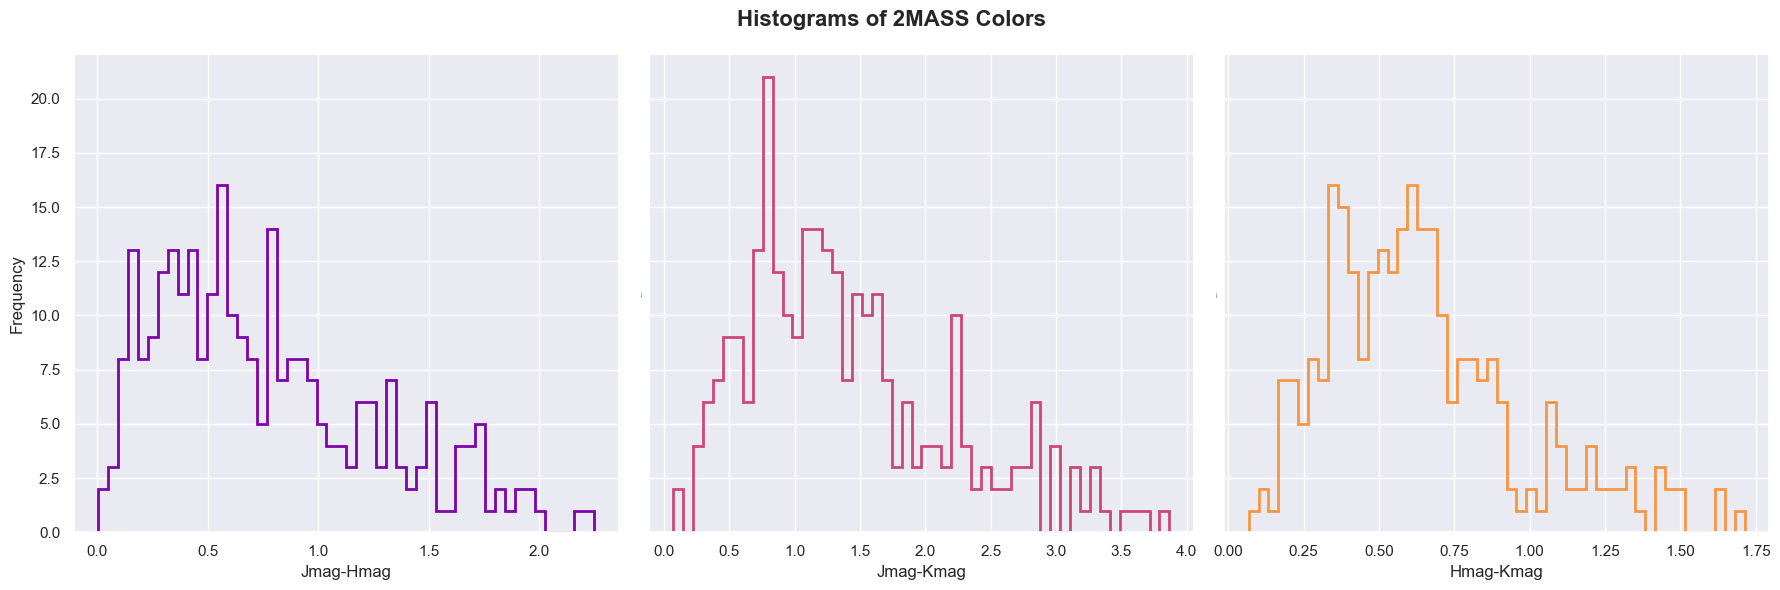

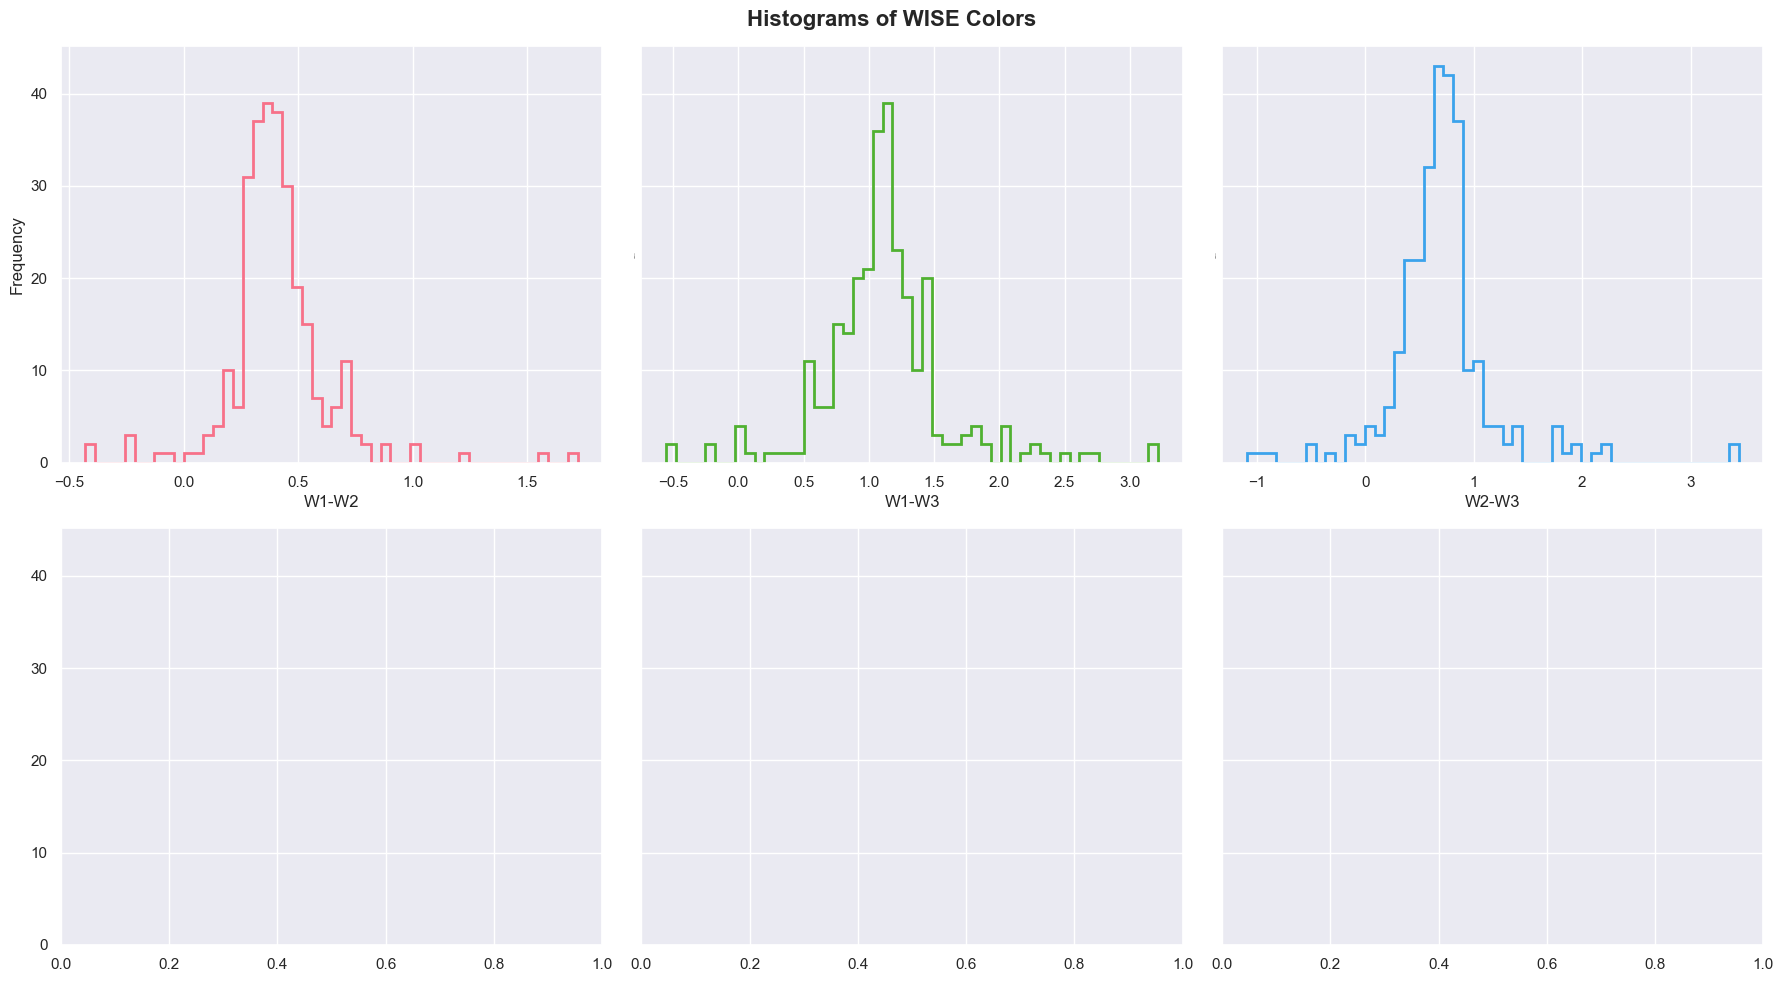

In [32]:
sns.set(style="darkgrid")
figsize = (18, 6)
linewidth = 2.0

fig, axes = plt.subplots(1, len(colores_gaia), figsize=figsize, sharey=True)
palette = sns.color_palette("inferno", len(colores_gaia))

for i, color in enumerate(colores_gaia):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)  # Solo el primer gráfico muestra la etiqueta y

fig.suptitle("Histograms of Gaia Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_gaia.png')
plt.show()

fig, axes = plt.subplots(1, len(colores_tmass), figsize=figsize, sharey=True)
palette = sns.color_palette("plasma", len(colores_tmass))

for i, color in enumerate(colores_tmass):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)

fig.suptitle("Histograms of 2MASS Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_tmass.png')
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
palette = sns.color_palette("husl", len(colores_wise))

for i, color in enumerate(colores_wise):
    row, col = divmod(i, 3)
    axes[row, col].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[row, col].set_xlabel(color, fontsize=12)
    axes[row, col].set_ylabel("Frequency", fontsize=12 if col == 0 else 0)

fig.suptitle("Histograms of WISE Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_wise.png')
plt.show()

## Fondo transparente
<a id='Fondo_transparente'></a>

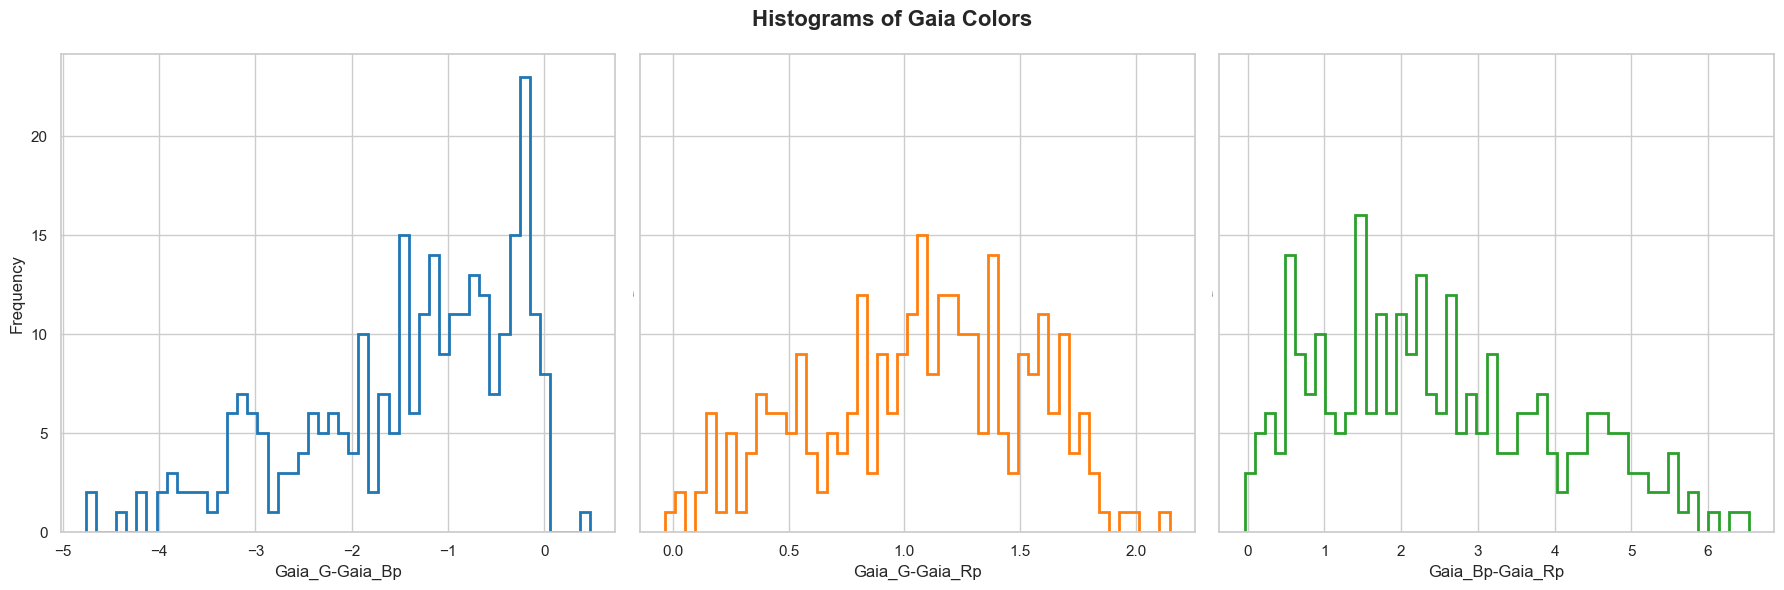

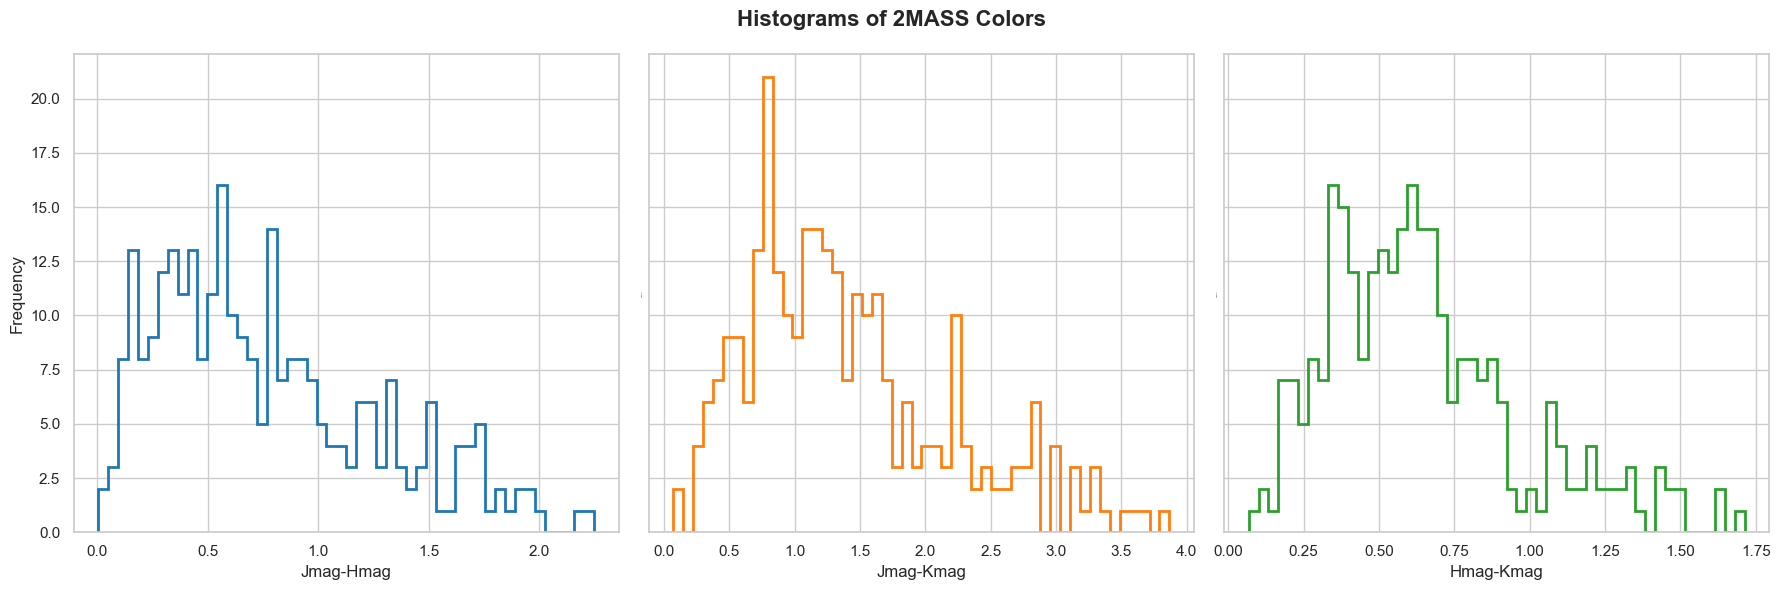

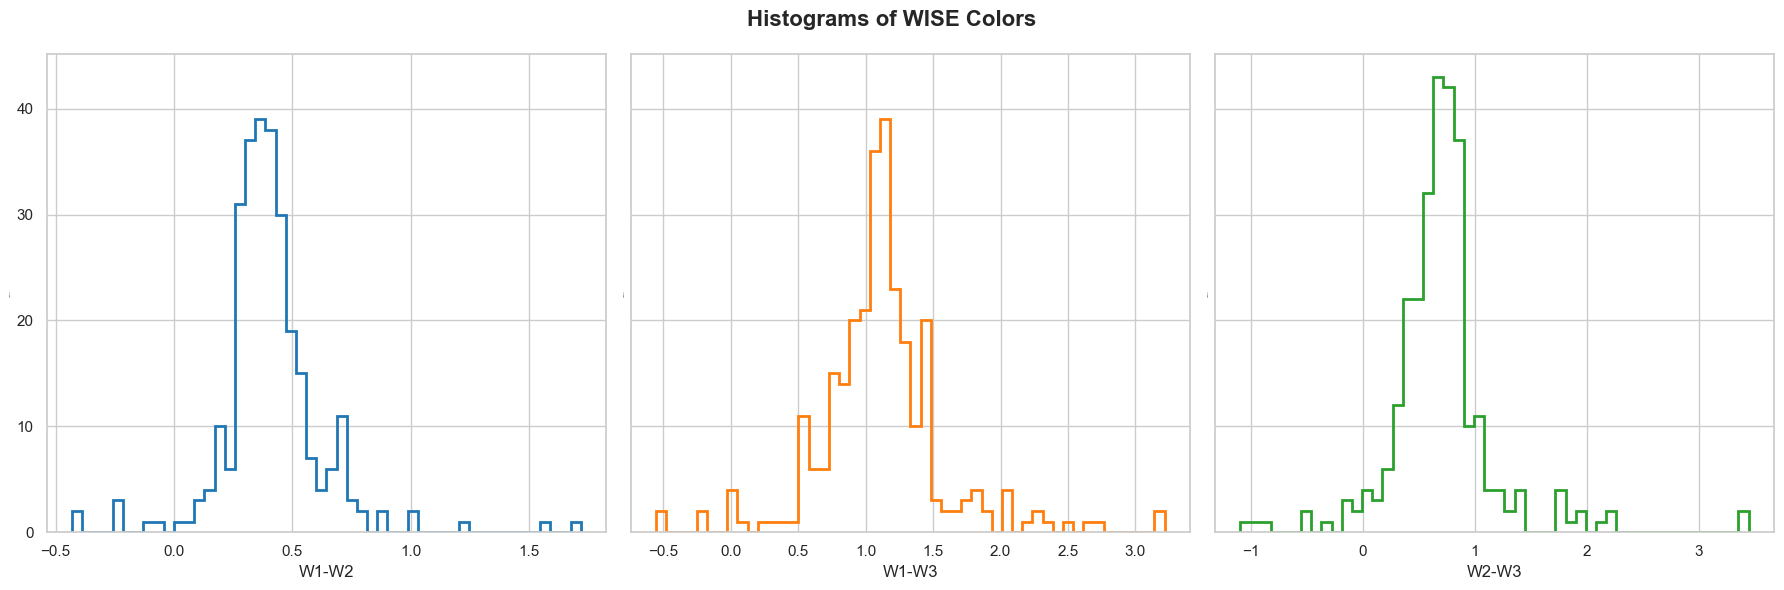

In [33]:
sns.set(style="whitegrid") 
figsize = (18, 6)
linewidth = 2.0

fig, axes = plt.subplots(1, len(colores_gaia), figsize=figsize, sharey=True)
palette = sns.color_palette("tab10", len(colores_gaia))
# GAIA
for i, color in enumerate(colores_gaia):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)

fig.suptitle("Histograms of Gaia Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_gaia_transparente.png', transparent=True)
plt.show()

# 2MASS
fig, axes = plt.subplots(1, len(colores_tmass), figsize=figsize, sharey=True)
palette = sns.color_palette("tab10", len(colores_tmass))

for i, color in enumerate(colores_tmass):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)

fig.suptitle("Histograms of 2MASS Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_tmass_transparente.png', transparent=True)
plt.show()

# wise
fig, axes = plt.subplots(1, len(colores_wise), figsize=figsize, sharey=True)
palette = sns.color_palette("tab10", len(colores_wise))

for i, color in enumerate(colores_wise):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if col == 0 else 0)

fig.suptitle("Histograms of WISE Colors", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_wise_transparente.png', transparent=True)
plt.show()

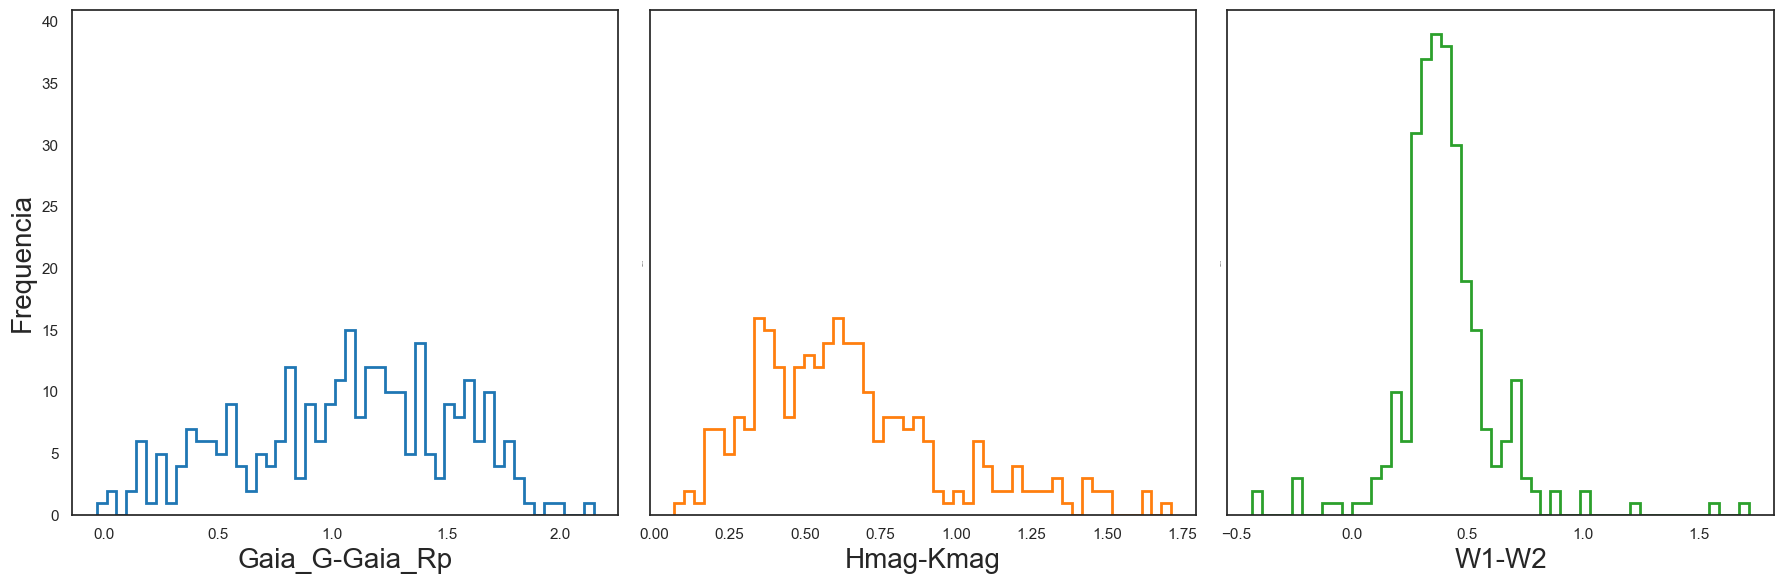

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")  
figsize = (18, 6)  
linewidth = 2.0  
colores = ['Gaia_G-Gaia_Rp', 'Hmag-Kmag', 'W1-W2']
palette = sns.color_palette("tab10", len(colores))

fig, axes = plt.subplots(1, len(colores), figsize=figsize, sharey=True)

for i, color in enumerate(colores):
    axes[i].hist(catalogo_entrenar[color].dropna(), bins=50, histtype='step', 
                 color=palette[i], linewidth=linewidth)
    axes[i].set_xlabel(color, fontsize=20)
    axes[i].set_ylabel("Frequencia", fontsize=20 if i == 0 else 0)


plt.tight_layout()
plt.savefig('Graficos/histogramas/colores_seleccionados.png', transparent=True)
plt.show()


## Histogramas colores por tipo
<a id='hist_color_tipo'></a>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
figsize = (18, 6)
linewidth = 2.0
spectral_types = catalogo_entrenar['WR Type Classification'].unique()

fig, axes = plt.subplots(1, len(colores_gaia), figsize=figsize, sharey=True)
palette_gaia = sns.color_palette("tab10", len(spectral_types))
for i, color in enumerate(colores_gaia):
    sns.kdeplot(catalogo_entrenar[color].dropna(), ax=axes[i], color='gray', fill=True, label='General')
    for t, spectral_type in enumerate(spectral_types):
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Classification'] == spectral_type]
        sns.kdeplot(subset[color].dropna(), ax=axes[i], color=palette_gaia[t], linewidth=linewidth, label=spectral_type)
    axes[i].set_xlabel(color, fontsize=15)
    if i == 0:
        axes[i].set_ylabel("Density", fontsize=15)
fig.suptitle("Gaia Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0].legend(title="Spectral Type", fontsize=15)
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_gaia_tipo.png')
plt.show()

# Histograma de colores 2MASS
fig, axes = plt.subplots(1, len(colores_tmass), figsize=figsize, sharey=True)
palette_tmass = sns.color_palette("tab10", len(spectral_types))
for i, color in enumerate(colores_tmass):
    sns.kdeplot(catalogo_entrenar[color].dropna(), ax=axes[i], color='gray', fill=True, label='General')
    for t, spectral_type in enumerate(spectral_types):
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Classification'] == spectral_type]
        sns.kdeplot(subset[color].dropna(), ax=axes[i], color=palette_tmass[t], linewidth=linewidth, label=spectral_type)
    axes[i].set_xlabel(color, fontsize=15)
    if i == 0:
        axes[i].set_ylabel("Density", fontsize=15)
fig.suptitle("2MASS Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0].legend(title="Spectral Type", fontsize=15)
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_2mass_tipo.png')
plt.show()

# Histograma de colores WISE
fig, axes = plt.subplots(1, len(colores_tmass), figsize=figsize, sharey=True)
palette_wise = sns.color_palette("tab10", len(spectral_types))
for i, color in enumerate(colores_wise):
    row, col = divmod(i, 3)
    sns.kdeplot(catalogo_entrenar[color].dropna(), ax=axes[row, col], color='gray', fill=True, label='General')
    for t, spectral_type in enumerate(spectral_types):
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Classification'] == spectral_type]
        sns.kdeplot(subset[color].dropna(), ax=axes[row, col], color=palette_wise[t], linewidth=linewidth, label=spectral_type)
    axes[row, col].set_xlabel(color, fontsize=15)
    if col == 0:
        axes[row, col].set_ylabel("Density", fontsize=15)
fig.suptitle("WISE Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0, 0].legend(title="Spectral Type", fontsize=15)
plt.tight_layout()
plt.savefig('Graficos/histogramas/color/colores_wise_tipo.png')
plt.show()

NameError: name 'colores_gaia' is not defined

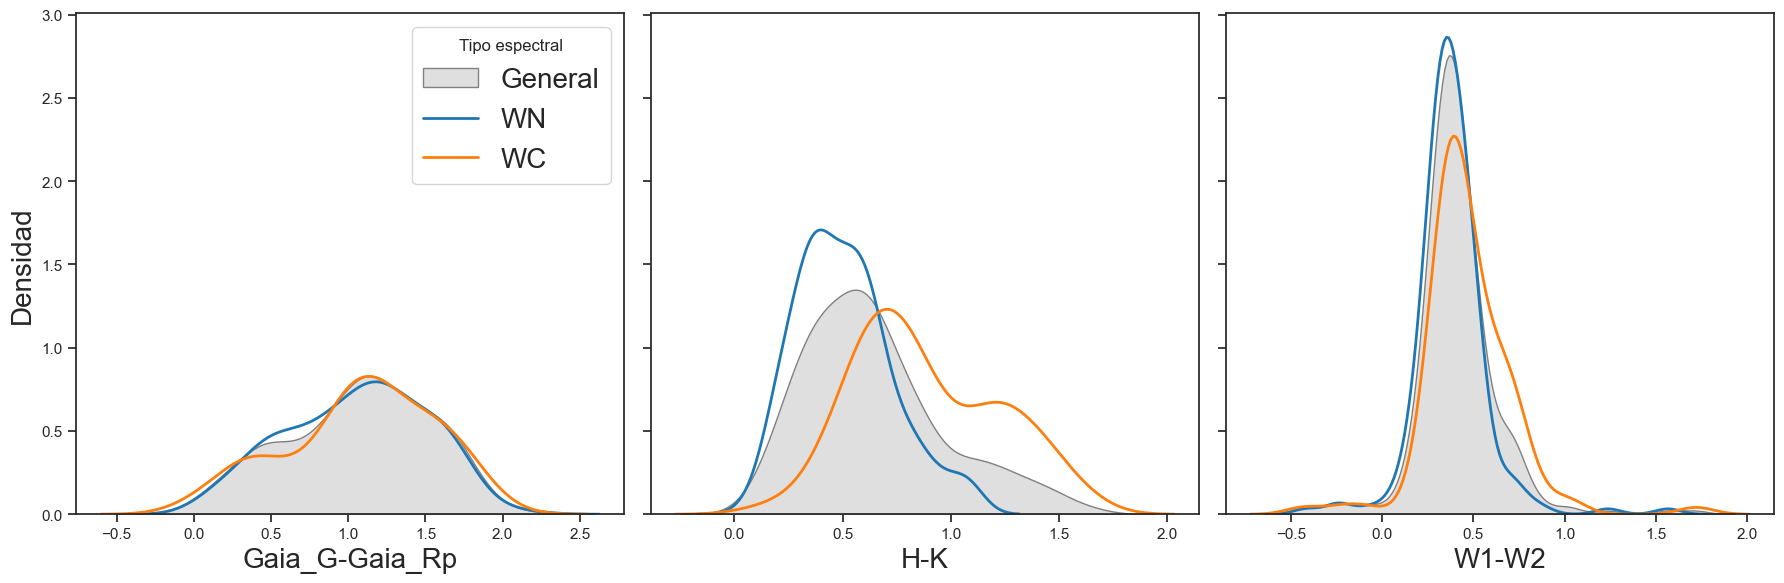

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")  
title_fontsize = 16  
ylabel_fontsize = 15  
xlabel_fontsize = 15 
figsize = (18, 6)  
linewidth = 2.0  

# Filtrar espectros que no contengan "transición"
catalogo_entrenar = catalogo_entrenar[~catalogo_entrenar['WR Type Classification'].str.contains("transición", case=False, na=False)]

colores = ['Gaia_G-Gaia_Rp', 'H-K', 'W1-W2']
spectral_types = catalogo_entrenar['WR Type Classification'].unique()
palette = sns.color_palette("tab10", len(spectral_types))

fig, axes = plt.subplots(1, len(colores), figsize=figsize, sharey=True)

for i, color in enumerate(colores):

    sns.kdeplot(catalogo_entrenar[color].dropna(), ax=axes[i], color='gray', fill=True, label='General')
    

    for t, spectral_type in enumerate(spectral_types):
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Classification'] == spectral_type]
        sns.kdeplot(subset[color].dropna(), ax=axes[i], color=palette[t], linewidth=linewidth, label=spectral_type)
    

    axes[i].set_xlabel(color, fontsize=20)
    if i == 0:
        axes[i].set_ylabel("Densidad", fontsize=20)


axes[0].legend(title="Tipo espectral", fontsize=20)

plt.tight_layout()
plt.savefig('Graficos/histogramas/colores_seleccionados_filtrados.png', transparent=True)
plt.show()


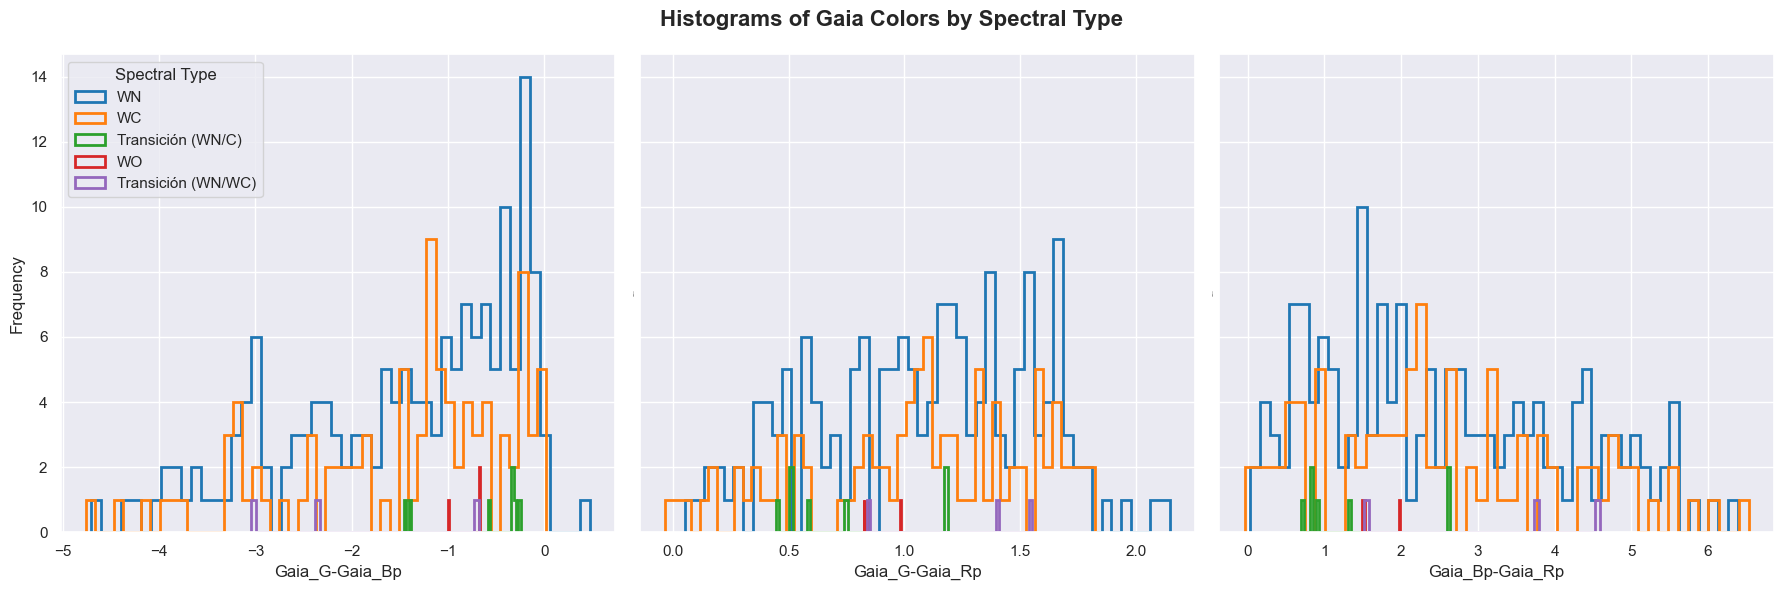

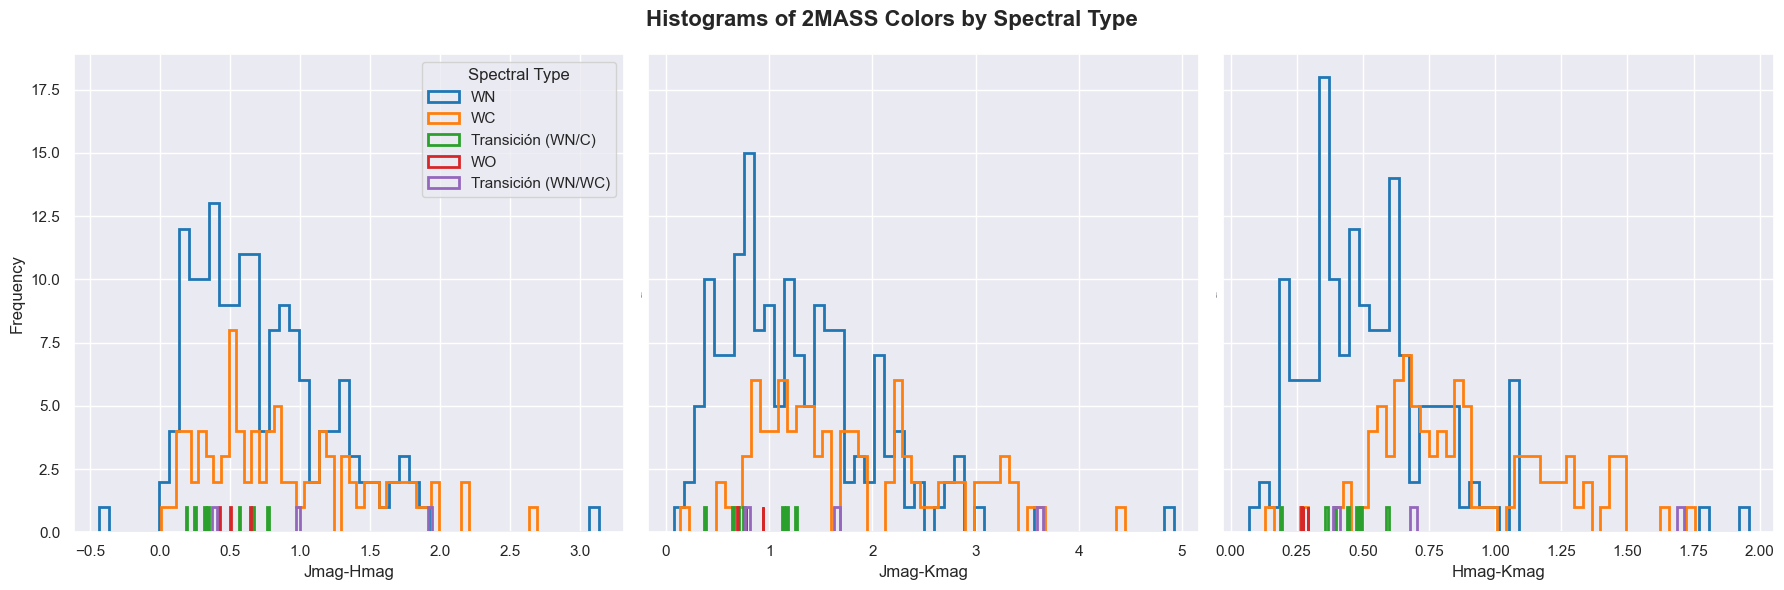

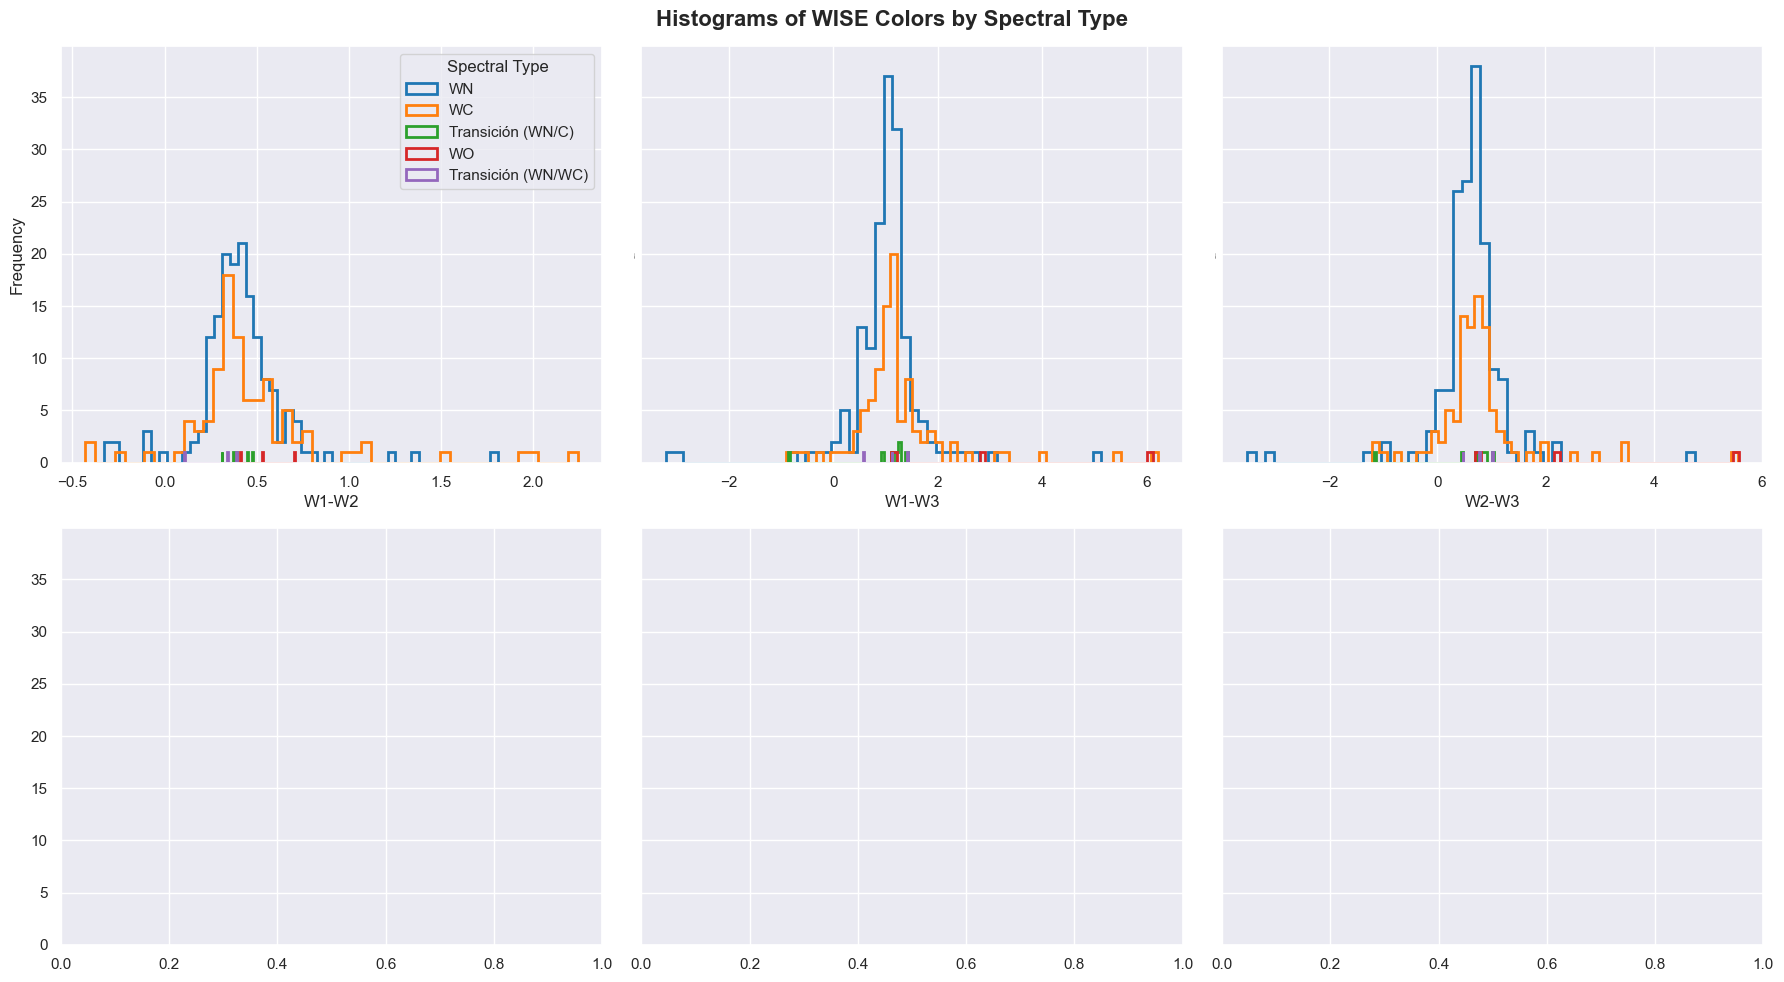

In [35]:
sns.set(style="darkgrid")
figsize = (18, 6)
linewidth = 2.0

spectral_types = catalogo_clasificaciones['WR Type Full Classification'].unique()

# Gaia
fig, axes = plt.subplots(1, len(colores_gaia), figsize=figsize, sharey=True)
palette_gaia = sns.color_palette("tab10", len(spectral_types))
for t, spectral_type in enumerate(spectral_types):
    subset = catalogo_clasificaciones[catalogo_clasificaciones['WR Type Full Classification'] == spectral_type]
    for i, color in enumerate(colores_gaia):
        axes[i].hist(subset[color].dropna(), bins=50, histtype='step', color=palette_gaia[t], label=spectral_type, linewidth=linewidth)
        axes[i].set_xlabel(color, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
fig.suptitle("Histograms of Gaia Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0].legend(title="Spectral Type")
plt.tight_layout()
plt.savefig('Graficos/histogramas/color por tipo/colores_gaia_full.png')
plt.show()

# 2MASS
fig, axes = plt.subplots(1, len(colores_tmass), figsize=figsize, sharey=True)
palette_tmass = sns.color_palette("tab10", len(spectral_types))
for t, spectral_type in enumerate(spectral_types):
    subset = catalogo_clasificaciones[catalogo_clasificaciones['WR Type Full Classification'] == spectral_type]
    for i, color in enumerate(colores_tmass):
        axes[i].hist(subset[color].dropna(), bins=50, histtype='step', color=palette_tmass[t], label=spectral_type, linewidth=linewidth)
        axes[i].set_xlabel(color, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
fig.suptitle("Histograms of 2MASS Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0].legend(title="Spectral Type")
plt.tight_layout()
plt.savefig('Graficos/histogramas/color por tipo/colores_2mass_full.png')
plt.show()

# Wise
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
palette_wise = sns.color_palette("tab10", len(spectral_types))
for t, spectral_type in enumerate(spectral_types):
    subset = catalogo_clasificaciones[catalogo_clasificaciones['WR Type Full Classification'] == spectral_type]
    for i, color in enumerate(colores_wise):
        row, col = divmod(i, 3)
        axes[row, col].hist(subset[color].dropna(), bins=50, histtype='step', color=palette_wise[t], label=spectral_type, linewidth=linewidth)
        axes[row, col].set_xlabel(color, fontsize=12)
        axes[row, col].set_ylabel("Frequency", fontsize=12 if col == 0 else 0)
fig.suptitle("Histograms of WISE Colors by Spectral Type", fontsize=16, fontweight='bold')
axes[0, 0].legend(title="Spectral Type")
plt.tight_layout()
plt.savefig('Graficos/histogramas/color por tipo/colores_wise_full.png')
plt.show()

# color - color 
<a id='color-color'></a>

In [37]:
unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
unique_types

array(['WN', 'WC', 'Transición (WN/C)'], dtype=object)

In [49]:
sns.set(style="whitegrid")
unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
palette = sns.color_palette(color_sns, len(unique_types))
type_colors = dict(zip(unique_types, palette))

color_combinations = list(combinations(colores_gaia, 2))
for color1, color2 in color_combinations:
    plt.figure(figsize=figsize)

    for wr_type in unique_types:
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Full Classification'] == wr_type]
        plt.scatter(
            subset[color1], subset[color2], 
            s=s, alpha=0.6, 
            label=wr_type, color=type_colors[wr_type], edgecolor=edgecolor, linewidth=0.5
        )

    x_min, x_max = catalogo_entrenar[color1].min(), catalogo_entrenar[color1].max()
    y_min, y_max = catalogo_entrenar[color2].min(), catalogo_entrenar[color2].max()
    plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'k--', lw=1.5, label="Límites de distribución")

    plt.text(x_min, y_min, f'({x_min:.3f}, {y_min:.3f})', ha='right', va='bottom', color='black', fontsize=15)
    plt.text(x_min, y_max, f'({x_min:.3f}, {y_max:.3f})', ha='right', va='top', color='black', fontsize=15)
    plt.text(x_max, y_min, f'({x_max:.3f}, {y_min:.3f})', ha='left', va='bottom', color='black', fontsize=15)
    plt.text(x_max, y_max, f'({x_max:.3f}, {y_max:.3f})', ha='left', va='top', color='black', fontsize=15)
    plt.xlabel(color1, fontsize='15')
    plt.ylabel(color2, fontsize='15')
    plt.legend(title="Wolf-Rayet Type", loc="best", markerscale=1.5)
    plt.title(f'{color1} vs {color2}', fontsize='15')
    plt.savefig(f'graficos/color-color/colores normales/gaia/{color1}_vs_{color2}.png')
    plt.close()

In [39]:
unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
palette = sns.color_palette(color_sns, len(unique_types))
type_colors = dict(zip(unique_types, palette))

color_combinations = list(combinations(colores_tmass, 2))
for color1, color2 in color_combinations:
    plt.figure(figsize=figsize)

    for wr_type in unique_types:
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Full Classification'] == wr_type]
        plt.scatter(
            subset[color1], subset[color2], 
            s=s, alpha=0.6, 
            label=wr_type, color=type_colors[wr_type], edgecolor=edgecolor, linewidth=0.5
        )
    x_min, x_max = catalogo_entrenar[color1].min(), catalogo_entrenar[color1].max()
    y_min, y_max = catalogo_entrenar[color2].min(), catalogo_entrenar[color2].max()

    plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'k--', lw=1.5, label="Límites de distribución")
    plt.text(x_min, y_min, f'({x_min:.3f}, {y_min:.3f})', ha='right', va='bottom', color='black', fontsize=15)
    plt.text(x_min, y_max, f'({x_min:.3f}, {y_max:.3f})', ha='right', va='top', color='black', fontsize=15)
    plt.text(x_max, y_min, f'({x_max:.3f}, {y_min:.3f})', ha='left', va='bottom', color='black', fontsize=15)
    plt.text(x_max, y_max, f'({x_max:.3f}, {y_max:.3f})', ha='left', va='top', color='black', fontsize=15)
    plt.xlabel(color1, fontsize='15')
    plt.ylabel(color2, fontsize='15')
    plt.legend(title="Wolf-Rayet Type", loc="best", markerscale=1.5, fontsize='15')
    plt.title(f'{color1} vs {color2}', fontsize='15')
    plt.savefig(f'graficos/color-color/colores normales/2mass/{color1}_vs_{color2}.png')
    plt.close()

In [48]:
unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
palette = sns.color_palette(color_sns, len(unique_types))
type_colors = dict(zip(unique_types, palette))

color_combinations = list(combinations(colores_wise, 2))
for color1, color2 in color_combinations:
    plt.figure(figsize=figsize)

    for wr_type in unique_types:
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Full Classification'] == wr_type]
        plt.scatter(
            subset[color1], subset[color2], 
            s=s, alpha=0.6, 
            label=wr_type, color=type_colors[wr_type], edgecolor=edgecolor, linewidth=0.5
        )
    x_min, x_max = catalogo_entrenar[color1].min(), catalogo_entrenar[color1].max()
    y_min, y_max = catalogo_entrenar[color2].min(), catalogo_entrenar[color2].max()

    plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'k--', lw=1.5, label="Límites de distribución")
    plt.text(x_min, y_min, f'({x_min:.3f}, {y_min:.3f})', ha='right', va='bottom', color='black', fontsize=15)
    plt.text(x_min, y_max, f'({x_min:.3f}, {y_max:.3f})', ha='right', va='top', color='black', fontsize=15)
    plt.text(x_max, y_min, f'({x_max:.3f}, {y_min:.3f})', ha='left', va='bottom', color='black', fontsize=15)
    plt.text(x_max, y_max, f'({x_max:.3f}, {y_max:.3f})', ha='left', va='top', color='black', fontsize=15)
    plt.xlabel(color1, fontsize='15')
    plt.ylabel(color2, fontsize='15')
    plt.legend(title="Wolf-Rayet Type", loc="best", markerscale=1.5)
    plt.title(f'{color1} vs {color2}', fontsize='15')
    plt.savefig(f'graficos/color-color/colores normales/wise/{color1}_vs_{color2}.png')
    plt.close()

In [47]:
unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
palette = sns.color_palette(color_sns, len(unique_types))
type_colors = dict(zip(unique_types, palette))
colores_tmass_original = ['Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag']
color_combinations = list(combinations(colores_tmass_original, 2))

for color1, color2 in color_combinations:
    plt.figure(figsize=figsize)

    for wr_type in unique_types:
        subset = catalogo_entrenar[catalogo_entrenar['WR Type Full Classification'] == wr_type]
        plt.scatter(
            subset[color1], subset[color2], 
            s=s, alpha=0.6, 
            label=wr_type, color=type_colors[wr_type], edgecolor=edgecolor, linewidth=0.5
        )
    x_min, x_max = catalogo_entrenar[color1].min(), catalogo_entrenar[color1].max()
    y_min, y_max = catalogo_entrenar[color2].min(), catalogo_entrenar[color2].max()

    plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], 'k--', lw=1.5, label="Límites de distribución")
    plt.text(x_min, y_min, f'({x_min:.3f}, {y_min:.3f})', ha='right', va='bottom', color='black', fontsize=15)
    plt.text(x_min, y_max, f'({x_min:.3f}, {y_max:.3f})', ha='right', va='top', color='black', fontsize=15)
    plt.text(x_max, y_min, f'({x_max:.3f}, {y_min:.3f})', ha='left', va='bottom', color='black', fontsize=15)
    plt.text(x_max, y_max, f'({x_max:.3f}, {y_max:.3f})', ha='left', va='top', color='black', fontsize=15)
    plt.xlabel([color1], fontsize='15')
    plt.ylabel([color2], fontsize='15')
    plt.legend(title="Wolf-Rayet Type", loc="best", markerscale=1.5)
    plt.title(f'{[color1]} vs {[color2]}',fontsize='15')
    plt.savefig(f'graficos/color-color/colores normales/2mass - gaia/{color1}_vs_{color2}.png')
    plt.close()

# Distribución

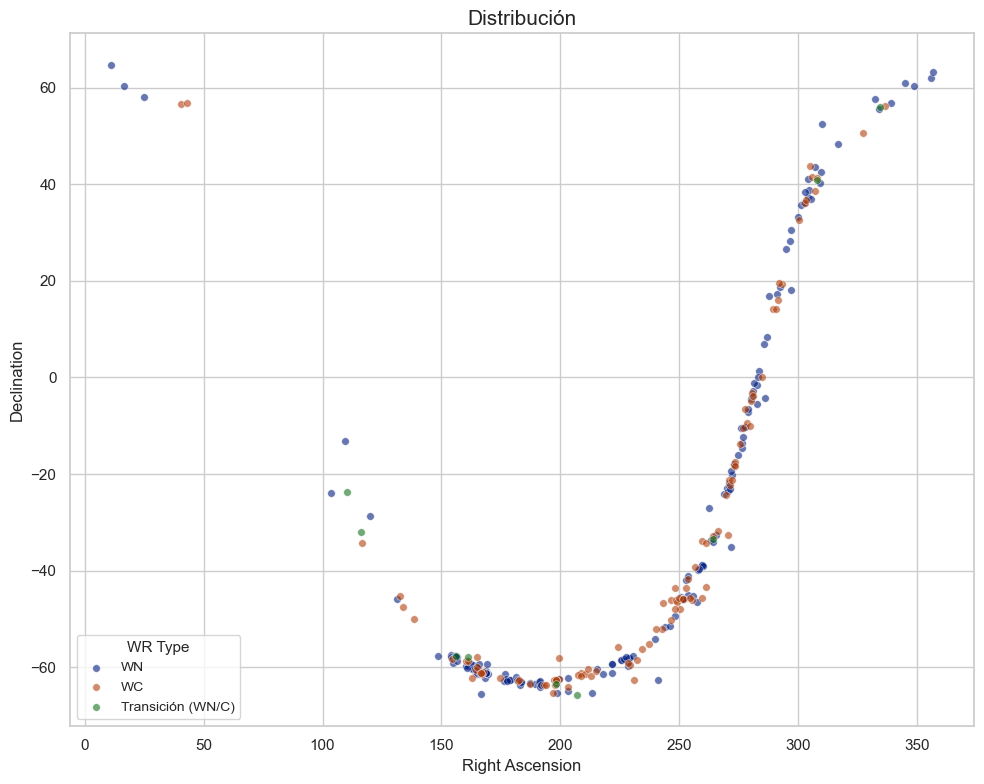

In [43]:
sns.set(style="whitegrid")

unique_types = catalogo_entrenar['WR Type Full Classification'].unique()
palette = sns.color_palette("dark", len(unique_types))
type_colors = dict(zip(unique_types, palette))

plt.figure(figsize=(10, 8))
for wr_type in unique_types:
    subset = catalogo_entrenar[catalogo_entrenar['WR Type Full Classification'] == wr_type]
    sns.scatterplot(
        x=subset['ra'], y=subset['dec'], 
        s=30, label=wr_type, color=type_colors[wr_type], edgecolor='w', linewidth=0.5, alpha=0.6
    )

plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
plt.title('Distribución', fontsize=15)
plt.legend(title="WR Type", loc="best", markerscale=1, fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.savefig('Graficos/distribucion/ra_dec.png', dpi=300)
plt.show()

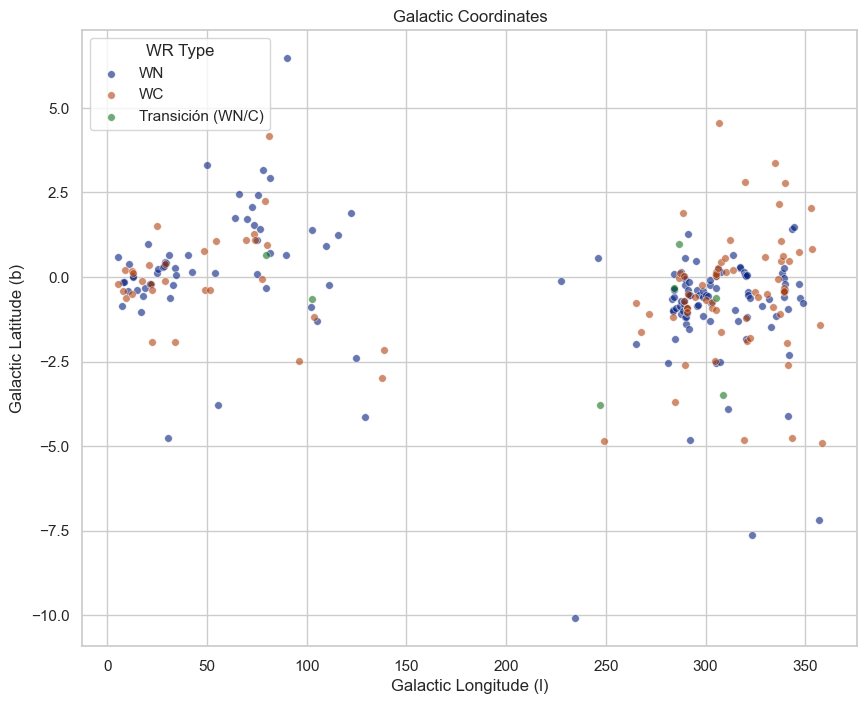

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
for wr_type in unique_types:
    subset = catalogo_clasificaciones[catalogo_clasificaciones['WR Type Full Classification'] == wr_type]
    plt.scatter(subset['l'], subset['b'], 
                s=30, label=wr_type, color=type_colors[wr_type], edgecolor='w',  linewidth=0.5, alpha=0.6)
plt.xlabel('Galactic Longitude (l)')
plt.ylabel('Galactic Latitude (b)')
plt.title('Galactic Coordinates')
plt.legend(title="WR Type", loc="best", markerscale=1)
plt.savefig('Graficos/distribucion/coordenadas_galacticas.png')
plt.show()

# Limits for the Gaia Query

In [46]:
color_columns = ['Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp', 'Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag',
                 'W1-W2', 'W1-W3', 'W2-W3']
additional_columns = ['parallax']

columns_of_interest = color_columns + additional_columns
filtered_catalog = catalogo_clasificaciones[columns_of_interest]
summary_stats = filtered_catalog.agg(['max', 'min', 'mean'])
summary_stats.head()

,Gaia_G-Gaia_Bp,Gaia_G-Gaia_Rp,Gaia_Bp-Gaia_Rp,Jmag-Hmag,Jmag-Kmag,Hmag-Kmag,W1-W2,W1-W3,W2-W3,parallax
max,0.476604,2.144290,6.533440,3.136000,4.922000,1.959000,2.243000,6.215000,5.578000,1.031491
min,-4.760460,-0.032364,-0.042825,-0.441000,0.072000,0.068000,-0.430000,-3.199000,-3.531000,0.000119
mean,-1.456154,1.065668,2.521821,0.783299,1.440481,0.657183,0.430418,1.116205,0.685787,0.249714


### Query 

    SELECT gaia.source_id, gaia.*, tmass.*, wise.*
    FROM gaiadr3.gaia_source AS gaia
    JOIN gaiadr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id) 
    JOIN gaiadr3.tmass_psc_xsc_join AS xjoin USING (clean_tmass_psc_xsc_oid) 
    JOIN gaiadr1.tmass_original_valid AS tmass ON xjoin.original_psc_source_id = tmass.designation 
    JOIN gaiadr3.allwise_best_neighbour AS wise_match USING (source_id)
    JOIN gaiadr1.allwise_original_valid AS wise ON wise_match.allwise_oid = wise.allwise_oid
    WHERE gaia.phot_g_mean_mag - gaia.phot_rp_mean_mag BETWEEN -0.03 AND 2.14
    AND gaia.phot_g_mean_mag - gaia.phot_bp_mean_mag BETWEEN -4.78 AND 0.48
    AND gaia.phot_bp_mean_mag - gaia.phot_rp_mean_mag BETWEEN 0.04 AND 6.53
    AND gaia.parallax IS NOT NULL
    AND gaia.parallax_over_error > 10.00
    AND tmass.j_m - tmass.h_m BETWEEN -0.44 AND 3.13
    AND tmass.j_m - tmass.ks_m BETWEEN 0.07 AND 4.92
    AND tmass.h_m - tmass.ks_m BETWEEN 0.07 AND 1.79
    AND wise.w1mpro - wise.w2mpro BETWEEN -0.43 AND 2.24
    AND wise.w1mpro - wise.w3mpro BETWEEN -3.20 AND 6.22
    AND wise.w1mpro - wise.w4mpro BETWEEN -0.67 AND 8.66
    AND wise.w2mpro - wise.w3mpro BETWEEN -3.53 AND 5.57
    AND wise.w2mpro - wise.w4mpro BETWEEN -0.98 AND 8.25
    AND wise.w3mpro - wise.w4mpro BETWEEN -1.55 AND 10.23
    AND gaia.phot_g_mean_mag < 16
    AND gaia.dec > -63.5